In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Seoul_Temp.csv'
temp = pd.read_csv(url)

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3287 non-null   object 
 1   avg     3287 non-null   float64
 2   min     3287 non-null   float64
 3   max     3287 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.8+ KB


In [4]:
temp.head()

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8


In [5]:
361+361

722

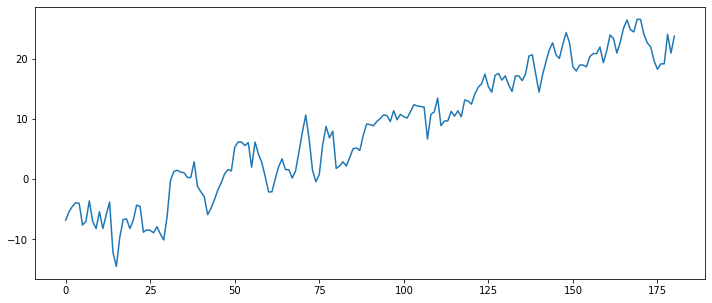

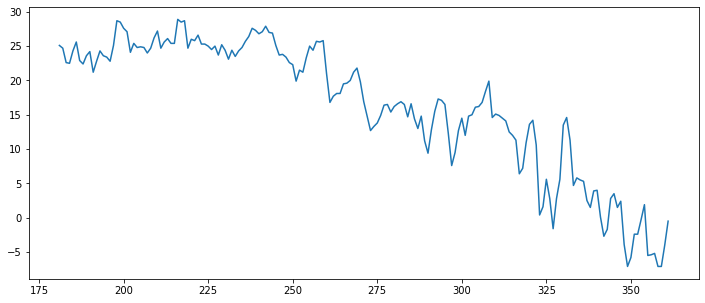

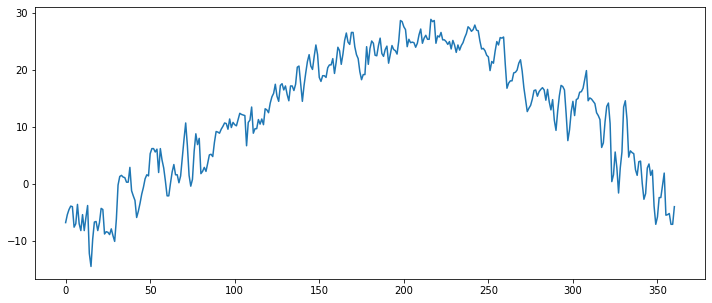

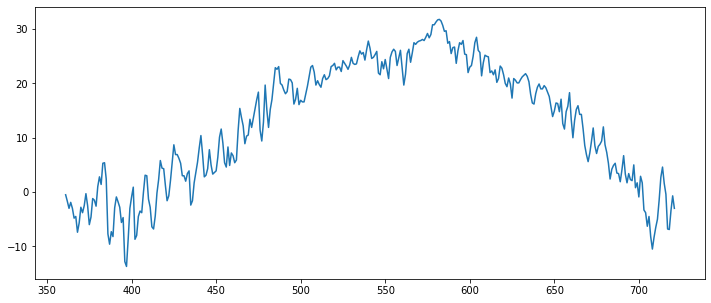

In [6]:
temp_data = temp[['avg']]

plt.figure(figsize=(12,5))
plt.plot(temp_data[:181])
plt.show()
plt.figure(figsize=(12,5))
plt.plot(temp_data[181:362])
plt.show()
plt.figure(figsize=(12,5))
plt.plot(temp_data[:361])
plt.show()
plt.figure(figsize=(12,5))
plt.plot(temp_data[361:722])
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(-1,1))

temp_data = scaler.fit_transform(temp_data)

In [8]:
train = temp_data[:2557]
test = temp_data[2557:]

print(2557/180, 730/180)  # 7:2

14.205555555555556 4.055555555555555


In [9]:
np.array(train).shape, np.array(test).shape

((2557, 1), (730, 1))

In [10]:
train[:5]

array([[-0.67010309],
       [-0.61237113],
       [-0.57525773],
       [-0.55051546],
       [-0.55463918]])

In [17]:
def create_dataset(time_data, look_back):
  X, y =[],[]

  for i in range(len(time_data) - 180):
    X.append(time_data[i:(i+180), 0])
    y.append(time_data[i+180, 0])

  return np.array(X), np.array(y)

In [18]:
look_back = 180 #일을 반복 주기로look_back = 180일을 반복 주기로

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180), (2377,), (550, 180), (550,))

In [ ]:
train_X[:1,:3]

In [19]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1],1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180, 1), (2377,), (550, 180, 1), (550,))

In [20]:
model = Sequential()
model.add(LSTM(64, input_shape=(None, 1)))
model.add(Dense(1, activation='tanh'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
%%time
Hist = model.fit(train_X, train_y, epochs=100, batch_size=550, validation_data=(test_X, test_y))

Epoch 1/100
5/5 [==============================] - 33s 133ms/step - loss: 0.1769 - val_loss: 0.0974
Epoch 2/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0844 - val_loss: 0.0383
Epoch 3/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0388 - val_loss: 0.0337
Epoch 4/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0308 - val_loss: 0.0186
Epoch 5/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0195 - val_loss: 0.0184
Epoch 6/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0198 - val_loss: 0.0184
Epoch 7/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0198 - val_loss: 0.0171
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0188 - val_loss: 0.0164
Epoch 9/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0183 - val_loss: 0.0159
Epoch 10/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0174 - val_loss: 0.0158
Epoch 11/100
5/5 

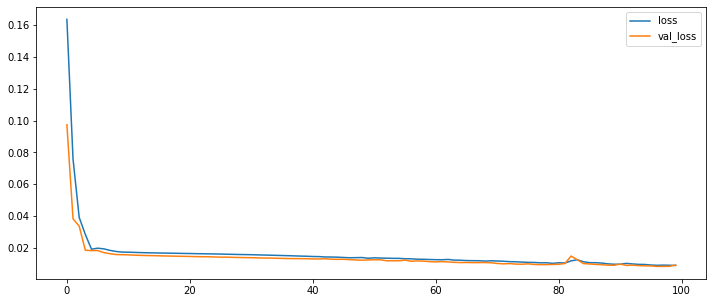

In [24]:
plt.figure(figsize=(12,5))
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()



In [26]:
train_score = model.evaluate(train_X, train_y, verbose=0)
print(train_score)

test_score = model.evaluate(test_X, test_y,verbose=0)
print(test_score)

0.009658291935920715
0.009312998503446579


(1, 180, 1)


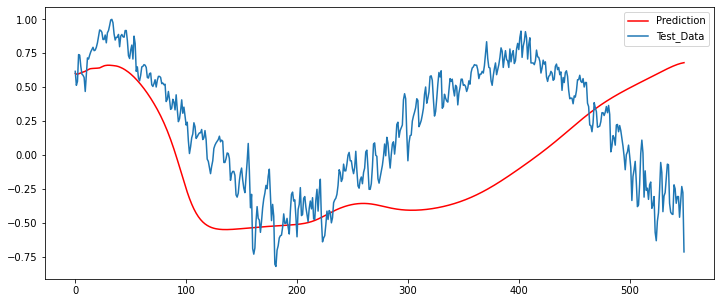

In [31]:
look_ahead=550

xhat=test_X[0]

#xhat.shape = (180,1)
predictions = np.zeros((look_ahead,1))
# predictions.shape = (550,1)
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=1)   # np.array([xhat]).shape = (1,180,1)
  predictions[i] = prediction
  xhat = np.vstack([xhat[1:], prediction])

plt.figure(figsize = (12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label = 'Prediction')
plt.plot(np.arange(look_ahead), test_y[:look_ahead], label = 'Test_Data')
plt.legend()
plt.show()